In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import pandas as pd
import numpy as np

#plt.rcParams["figure.figsize"] = (4,3)
mpl.rcParams['lines.linewidth'] = 1

In [2]:
blue1 = "#0B64D4"
blue2 = "#0CB2F6"

blue3 = "#0DB9FA"

magenta1 = "#A80DFA"
magenta2 = "#CF0BDE"

red1 = "#FA4A0D"
red2 = "#DE600B"

orange1 = "#FAA30D"
orange2 = "#F5CD00"

green1 = "#0DFA2C"
green2 = "#00F4A9"

ground_truth = "/gazebo/model_states/pose[1]/position/x:y"
odometry_filtered = "/odometry/filtered/pose/pose/position/x:y"

# https://www.clearpathrobotics.com/assets/guides/kinetic/husky/InterfacingWithHusky.html

## Ground truth vs odometry filtered
### Ground truth
From gazebo topic `/gazebo/model_states`
### Odometry Filtered
From husky topic `/odemtry/filtered`

Source: `ekf_localization_node`

Description: Fused odometry estimate (encoders and IMU)

https://www.clearpathrobotics.com/assets/guides/kinetic/husky/InterfacingWithHusky.html

# Exercise 1.1, 1.2, 1.3 & 1.4

Position and error graph

/tmp/ipykernel_5026/862309561.py:95: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7fc4d45c42e0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax3.legend(["ground truth",
/tmp/ipykernel_5026/862309561.py:95: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7fc4d45c4e80> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax3.legend(["ground truth",
/tmp/ipykernel_5026/862309561.py:95: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7fc4d45c4e20> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax3.legend(["ground truth",
/tmp/ipykernel_5026/862309561.py:95: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7fc4d603ccd0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax3.legend(["ground truth",


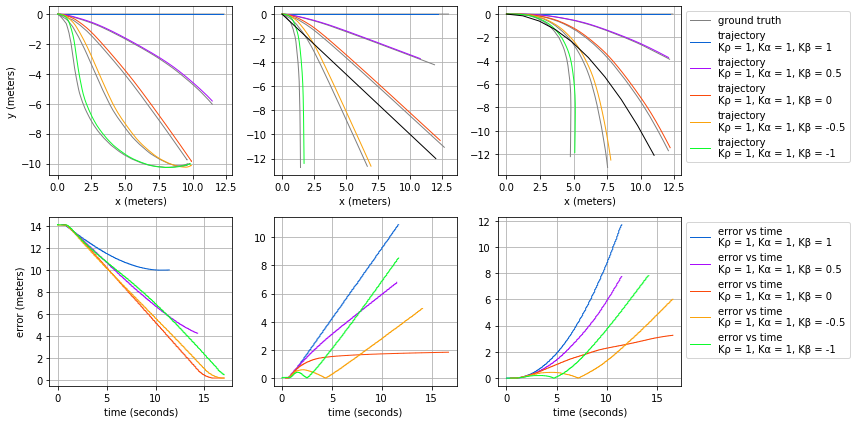

In [25]:
ms_11_111 = pd.read_csv(r'problem11_111_ms_1.csv')
of_11_111 = pd.read_csv(r'problem11_111_of_1.csv')
ms_11_1105 = pd.read_csv(r'problem11_1105_ms_1.csv')
of_11_1105 = pd.read_csv(r'problem11_1105_of_1.csv')
ms_11_110 = pd.read_csv(r'problem11_110_ms_1.csv')
of_11_110 = pd.read_csv(r'problem11_110_of_1.csv')
ms_11_11_05 = pd.read_csv(r'problem11_11n05_ms_1.csv')
of_11_11_05 = pd.read_csv(r'problem11_11n05_of_1.csv')
ms_11_11_1 = pd.read_csv(r'problem11_11n1_ms_1.csv')
of_11_11_1 = pd.read_csv(r'problem11_11n1_of_1.csv')

ms_12_111 = pd.read_csv(r'problem12_111_ms_1.csv')
of_12_111 = pd.read_csv(r'problem12_111_of_1.csv')
ms_12_1105 = pd.read_csv(r'problem12_1105_ms_1.csv')
of_12_1105 = pd.read_csv(r'problem12_1105_of_1.csv')
ms_12_110 = pd.read_csv(r'problem12_110_ms_1.csv')
of_12_110 = pd.read_csv(r'problem12_110_of_1.csv')
ms_12_11_05 = pd.read_csv(r'problem12_11n05_ms_1.csv')
of_12_11_05 = pd.read_csv(r'problem12_11n05_of_1.csv')
#ms_12_11_06 = pd.read_csv(r'problem12_11n06_ms_1.csv')
#of_12_11_06 = pd.read_csv(r'problem12_11n06_of_1.csv')
ms_12_11_1 = pd.read_csv(r'problem12_11n1_ms_1.csv')
of_12_11_1 = pd.read_csv(r'problem12_11n1_of_1.csv')

ms_13_111 = pd.read_csv(r'problem13_111_ms_1.csv')
of_13_111 = pd.read_csv(r'problem13_111_of_1.csv')
ms_13_1105 = pd.read_csv(r'problem13_1105_ms_1.csv')
of_13_1105 = pd.read_csv(r'problem13_1105_of_1.csv')
ms_13_110 = pd.read_csv(r'problem13_110_ms_1.csv')
of_13_110 = pd.read_csv(r'problem13_110_of_1.csv')
ms_13_11_05 = pd.read_csv(r'problem13_11n05_ms_1.csv')
of_13_11_05 = pd.read_csv(r'problem13_11n05_of_1.csv')
ms_13_11_1 = pd.read_csv(r'problem13_11n1_ms_2.csv')
of_13_11_1 = pd.read_csv(r'problem13_11n1_of_2.csv')

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=[12,6])
fig.tight_layout()

ax1.plot(ms_11_111.x, ms_11_111.y, color="grey")
ax1.plot(of_11_111.x, of_11_111.y, color=blue1)
ax1.plot(ms_11_1105.x, ms_11_1105.y, color="grey")
ax1.plot(of_11_1105.x, of_11_1105.y, color=magenta1)
ax1.plot(ms_11_110.x, ms_11_110.y, color="grey")
ax1.plot(of_11_110.x, of_11_110.y, color=red1)
ax1.plot(ms_11_11_05.x, ms_11_11_05.y, color="grey")
ax1.plot(of_11_11_05.x, of_11_11_05.y, color=orange1)
ax1.plot(ms_11_11_1.x, ms_11_11_1.y, color="grey")
ax1.plot(of_11_11_1.x, of_11_11_1.y, color=green1)
ax1.set_ylabel("y (meters)")
ax1.set_xlabel("x (meters)")
ax1.grid()

a = -1
def first_order(x):
    return a * x
first_order_x = np.linspace(0, 12, 10)
first_order_y = first_order(first_order_x)

ax2.plot(ms_12_111.x, ms_12_111.y, color="grey")
ax2.plot(of_12_111.x, of_12_111.y, color=blue1)
ax2.plot(ms_12_1105.x, ms_12_1105.y, color="grey")
ax2.plot(of_12_1105.x, of_12_1105.y, color=magenta1)
ax2.plot(ms_12_110.x, ms_12_110.y, color="grey")
ax2.plot(of_12_110.x, of_12_110.y, color=red1)
ax2.plot(ms_12_11_05.x, ms_12_11_05.y, color="grey")
ax2.plot(of_12_11_05.x, of_12_11_05.y, color=orange1)
#ax2.plot(ms_12_11_06.x, ms_12_11_06.y, color="grey")
#ax2.plot(of_12_11_06.x, of_12_11_06.y, color=blue3)
ax2.plot(ms_12_11_1.x, ms_12_11_1.y, color="grey")
ax2.plot(of_12_11_1.x, of_12_11_1.y, color=green1)
ax2.plot(first_order_x, first_order_y, color="black")
ax2.set_xlabel("x (meters)")
ax2.grid()

a = -0.1
def second_order(x):
    return a * x**2
second_order_x = np.linspace(0, 11, 10)
second_order_y = second_order(second_order_x)

ax3.plot(ms_13_111.x, ms_13_111.y, color="grey")
ax3.plot(of_13_111.x, of_13_111.y, color=blue1)
ax3.plot(ms_13_1105.x, ms_13_1105.y, color="grey")
ax3.plot(of_13_1105.x, of_13_1105.y, color=magenta1)
ax3.plot(ms_13_110.x, ms_13_110.y, color="grey")
ax3.plot(of_13_110.x, of_13_110.y, color=red1)
ax3.plot(ms_13_11_05.x, ms_13_11_05.y, color="grey")
ax3.plot(of_13_11_05.x, of_13_11_05.y, color=orange1)
ax3.plot(ms_13_11_1.x, ms_13_11_1.y, color="grey")
ax3.plot(of_13_11_1.x, of_13_11_1.y, color=green1)
ax3.plot(second_order_x, second_order_y, color="black")
ax3.set_xlabel("x (meters)")
ax3.grid()

ax3.legend(["ground truth",
            "trajectory\nKρ = 1, Kα = 1, Kβ = 1","_nolegend_",
            "trajectory\nKρ = 1, Kα = 1, Kβ = 0.5","_nolegend_",
            "trajectory\nKρ = 1, Kα = 1, Kβ = 0","_nolegend_",
            "trajectory\nKρ = 1, Kα = 1, Kβ = -0.5","_nolegend_",
            "trajectory\nKρ = 1, Kα = 1, Kβ = -1"], bbox_to_anchor = (1, 1))

rho_11_111 = pd.read_csv(r'problem11_111_rho_1.csv')
rho_11_1105 = pd.read_csv(r'problem11_1105_rho_1.csv')
rho_11_110 = pd.read_csv(r'problem11_110_rho_1.csv')
rho_11_11_05 = pd.read_csv(r'problem11_11n05_rho_1.csv')
rho_11_11_1 = pd.read_csv(r'problem11_11n1_rho_1.csv')

rho_12_111 = pd.read_csv(r'problem12_111_rho_1.csv')
rho_12_1105 = pd.read_csv(r'problem12_1105_rho_1.csv')
rho_12_110 = pd.read_csv(r'problem12_110_rho_1.csv')
rho_12_11_05 = pd.read_csv(r'problem12_11n05_rho_1.csv')
rho_12_11_1 = pd.read_csv(r'problem12_11n1_rho_1.csv')

rho_13_111 = pd.read_csv(r'problem13_111_rho_1.csv')
rho_13_1105 = pd.read_csv(r'problem13_1105_rho_1.csv')
rho_13_110 = pd.read_csv(r'problem13_110_rho_1.csv')
rho_13_11_05 = pd.read_csv(r'problem13_11n05_rho_1.csv')
rho_13_11_1 = pd.read_csv(r'problem13_11n1_rho_2.csv')


#fig, (ax1, ax2, ax3) = plt.subplots(1,3)
#fig.set_figheight(3)
#fig.set_figwidth(10)

ax4.plot(rho_11_111.timestamp/10**9, rho_11_111.error, color=blue1)
ax4.plot(rho_11_1105.timestamp/10**9, rho_11_1105.error, color=magenta1)
ax4.plot(rho_11_110.timestamp/10**9, rho_11_110.error, color=red1)
ax4.plot(rho_11_11_05.timestamp/10**9, rho_11_11_05.error, color=orange1)
ax4.plot(rho_11_11_1.timestamp/10**9, rho_11_11_1.error, color=green1)
ax4.set_ylabel("error (meters)")
ax4.set_xlabel("time (seconds)")
ax4.grid()

ax5.plot(rho_12_111.timestamp/10**9, rho_12_111.error, color=blue1)
ax5.plot(rho_12_1105.timestamp/10**9, rho_12_1105.error, color=magenta1)
ax5.plot(rho_12_110.timestamp/10**9, rho_12_110.error, color=red1)
ax5.plot(rho_12_11_05.timestamp/10**9, rho_12_11_05.error, color=orange1)
ax5.plot(rho_12_11_1.timestamp/10**9, rho_12_11_1.error, color=green1)
ax5.set_xlabel("time (seconds)")
ax5.grid()

ax6.plot(rho_13_111.timestamp/10**9, rho_13_111.error, color=blue1)
ax6.plot(rho_13_1105.timestamp/10**9, rho_13_1105.error, color=magenta1)
ax6.plot(rho_13_110.timestamp/10**9, rho_13_110.error, color=red1)
ax6.plot(rho_13_11_05.timestamp/10**9, rho_13_11_05.error, color=orange1)
ax6.plot(rho_13_11_1.timestamp/10**9, rho_13_11_1.error, color=green1)
ax6.set_xlabel("time (seconds)")
ax6.grid()


"""
plt.legend(["error vs time\nKρ = 1, Kα = 1, Kβ = 1",
            "error vs time\nKρ = 1, Kα = 1, Kβ = 0.5",
            "error vs time\nKρ = 1, Kα = 1, Kβ = 0.2",
            "error vs time\nKρ = 1, Kα = 1, Kβ = 0",])
"""
#plt.xlabel("time")
#plt.ylabel("error (rho)")

ax6.legend(["error vs time\nKρ = 1, Kα = 1, Kβ = 1",
            "error vs time\nKρ = 1, Kα = 1, Kβ = 0.5",
            "error vs time\nKρ = 1, Kα = 1, Kβ = 0",
            "error vs time\nKρ = 1, Kα = 1, Kβ = -0.5",
            "error vs time\nKρ = 1, Kα = 1, Kβ = -1"], bbox_to_anchor = (1, 1))

plt.tight_layout()
plt.savefig("problem1-multiplot.svg", format="svg")
plt.show()

In [4]:
"""
def interpolate(inp, fi):
    i, f = int(fi // 1), fi % 1  # Split floating-point index into whole & fractional parts.
    j = i+1 if f > 0 else i      # Avoid index error.
    return (1-f) * inp[i] + f * inp[j]

len_input = len(of.x.values)
len_output = len(ms.x.values)
delta_len = (len_input - 1) / (len_output - 1)

of_interpolated = [
    [
        interpolate(of.timestamp.values, i * delta_len),
        interpolate(of.x.values, i * delta_len),
        interpolate(of.y.values, i * delta_len)
    ] for i in range(len_output)
]
"""

"""
zlist = list(zip(ms.values.tolist(), of_interpolated))

(ms_time_n, ms_x_n, ms_y_n), (of_time_n, of_x_n, of_y_n) = zlist[0]
print(ms_time_n)
"""
"""
error = np.array([
    [
        (of_time_n + ms_time_n) / 2,
        np.sqrt((of_x_n - ms_x_n)**2 + (of_y_n - ms_y_n)**2)
    ] for (ms_time_n, ms_x_n, ms_y_n), (of_time_n, of_x_n, of_y_n) in zip(ms.values.tolist(), of_interpolated)
])
"""

'\nerror = np.array([\n    [\n        (of_time_n + ms_time_n) / 2,\n        np.sqrt((of_x_n - ms_x_n)**2 + (of_y_n - ms_y_n)**2)\n    ] for (ms_time_n, ms_x_n, ms_y_n), (of_time_n, of_x_n, of_y_n) in zip(ms.values.tolist(), of_interpolated)\n])\n'

# Exercise 2.1

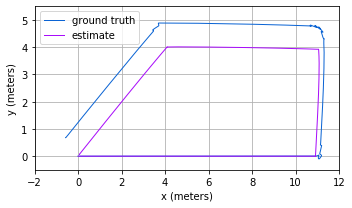

In [17]:
ms = pd.read_csv(r'problem2_ms_3.csv')
of = pd.read_csv(r'problem2_of_3.csv')

fig, ax = plt.subplots(1,1, figsize=[5,3])

ax.plot(ms.x, ms.y, color=blue1)
ax.plot(of.x, of.y, color=magenta1)
ax.set_ylim([-0.5,5.5])
ax.set_xlim([-2,12])
ax.grid()
ax.set_xlabel("x (meters)")
ax.set_ylabel("y (meters)")
ax.legend(["ground truth", "estimate"], loc='upper left')
# /gazebo/model_states
# /odometry/filtered
plt.tight_layout()
plt.savefig("problem2-position.svg", format="svg")
plt.show()

In [6]:
yaw_data = pd.read_csv(r'yaw_angles.txt')
ms = pd.DataFrame(yaw_data, columns=['model_states_recceipt_time', 'model_states_yaw'])
of = pd.DataFrame(yaw_data, columns=['odometry_filtered_recceipt_time', 'odometry_filtered_yaw'])

nan_value = float("NaN")
of.replace(" ", nan_value, inplace=True)
of.dropna(inplace=True)

of = of.astype(float)
of.dtypes

odometry_filtered_recceipt_time    float64
odometry_filtered_yaw              float64
dtype: object

# Exercise 2.2
Linear velocity

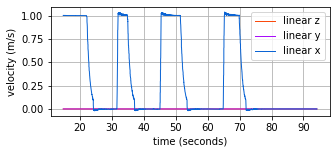

In [7]:
linear_vel_data = pd.read_csv(r'rqt_multiplot_ex2.2_linear.txt')

vel_x = pd.DataFrame(linear_vel_data, columns=['of_linear_x_time','of_linear_x'])
vel_y = pd.DataFrame(linear_vel_data, columns=['of_linear_y_time','of_linear_y'])
vel_z = pd.DataFrame(linear_vel_data, columns=['of_linear_z_time','of_linear_z'])

fig, ax = plt.subplots(1,1, figsize=[5,2])

ax.plot(vel_z.of_linear_z_time, vel_z.of_linear_z, color=red1)
ax.plot(vel_y.of_linear_y_time, vel_y.of_linear_y, color=magenta1)
ax.plot(vel_x.of_linear_x_time, vel_x.of_linear_x, color=blue1)
ax.legend(["linear z", "linear y", "linear x"])
ax.set_ylabel("velocity (m/s)")
ax.set_xlabel("time (seconds)")
ax.grid()
plt.show()

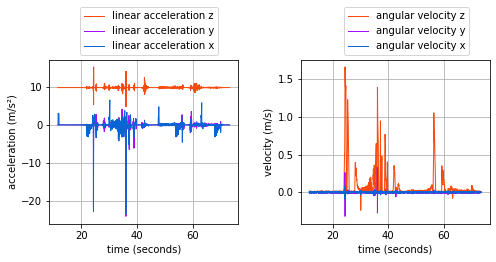

In [8]:
linear_acc = pd.read_csv(r'ex2.2_linear_acceleration.txt')

linear_acc_x = pd.DataFrame(linear_acc, columns=['linear_acc_x_time', 'linear_acc_x'])
linear_acc_y = pd.DataFrame(linear_acc, columns=['linear_acc_y_time', 'linear_acc_y'])
linear_acc_z = pd.DataFrame(linear_acc, columns=['linear_acc_z_time', 'linear_acc_z'])

angular_vel = pd.read_csv(r'ex2.2_angular_velocity.txt')

angular_vel_x = pd.DataFrame(angular_vel, columns=['angular_vel_x_time', 'angular_vel_x'])
angular_vel_y = pd.DataFrame(angular_vel, columns=['angular_vel_y_time', 'angular_vel_y'])
angular_vel_z = pd.DataFrame(angular_vel, columns=['angular_vel_z_time', 'angular_vel_z'])

fig, (ax1, ax2) = plt.subplots(1,2, figsize=[7,4])

ax1.plot(linear_acc_z.linear_acc_z_time, linear_acc_z.linear_acc_z, color=red1)
ax1.plot(linear_acc_y.linear_acc_y_time, linear_acc_y.linear_acc_y, color=magenta1)
ax1.plot(linear_acc_x.linear_acc_x_time, linear_acc_x.linear_acc_x, color=blue1)
ax1.legend(["linear acceleration z", "linear acceleration y", "linear acceleration x"], bbox_to_anchor=(0.92,1.35))
ax1.set_ylabel("acceleration (m/s²)")
ax1.set_xlabel("time (seconds)")
ax1.grid()

ax2.plot(angular_vel_z.angular_vel_z_time, angular_vel_z.angular_vel_z, color=red1)
ax2.plot(angular_vel_y.angular_vel_y_time, angular_vel_y.angular_vel_y, color=magenta1)
ax2.plot(angular_vel_x.angular_vel_x_time, angular_vel_x.angular_vel_x, color=blue1)
ax2.legend(["angular velocity z", "angular velocity y", "angular velocity x"], bbox_to_anchor=(0.92,1.35))
ax2.set_ylabel("velocity (m/s)")
ax2.set_xlabel("time (seconds)")
ax2.grid()

plt.tight_layout()
plt.savefig("problem2-imu.svg", format="svg")
plt.show()

# Exercise 2.3
Distance estimation

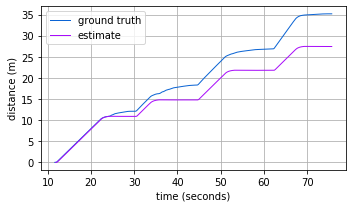

In [9]:
distance = pd.read_csv("ex2.3_accumulated_distance.txt")

of_d = pd.DataFrame(distance, columns=["of_time", "of_distance"])
ms_d = pd.DataFrame(distance, columns=["ms_time", "ms_distance"])

fig, ax = plt.subplots(1,1, figsize=[5,3])

ax.plot(ms_d.ms_time, ms_d.ms_distance, color=blue1)
ax.plot(of_d.of_time, of_d.of_distance, color=magenta1)
ax.legend(["ground truth", "estimate"])
ax.set_ylabel("distance (m)")
ax.set_xlabel("time (seconds)")
ax.grid()

plt.tight_layout()
plt.savefig("problem2-distance.svg", format="svg")
plt.show()

# Exercise 2.4
Yaw estimation

/tmp/ipykernel_5026/2060669191.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


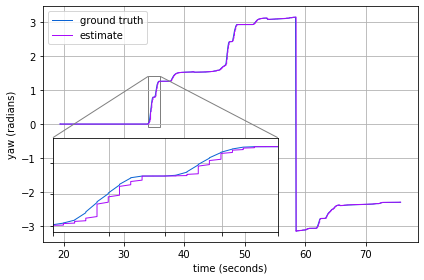

In [10]:
data = pd.read_csv(r'yaw_angles.txt')
ms = pd.DataFrame(data, columns=["model_states_receipt_time", "model_states_yaw"])
of = pd.DataFrame(data, columns=["odometry_filtered_receipt_time", "odometry_filtered_yaw"])

fig, ax = plt.subplots(1,1, figsize=[6,4])
axins = inset_axes(ax, width="60%", height="40%", loc=3, borderpad=1)
axins.tick_params(labelleft=False, labelbottom=False)

ax.plot(ms.model_states_receipt_time, ms.model_states_yaw, color=blue1)
ax.plot(of.odometry_filtered_receipt_time, of.odometry_filtered_yaw, color=magenta1)
axins.plot(ms.model_states_receipt_time, ms.model_states_yaw, color=blue1)
axins.plot(of.odometry_filtered_receipt_time, of.odometry_filtered_yaw, color=magenta1)
axins.set_xlim(34, 36)
axins.set_ylim(-0.1, 1.4)
axins.grid()
mark_inset(ax, axins, loc1=1, loc2=2, fc="none", ec="0.5")
ax.set_ylabel("yaw (radians)")
ax.set_xlabel("time (seconds)")
ax.grid()
#ax.xlabel("time")
#ax.ylabel("yaw (radians)")
ax.legend(["ground truth", "estimate"], loc='upper left')
# /gazebo/model_states/pose[2]/orientation/z
# /odometry/filtered/post/pose/orientation/z
plt.tight_layout()
plt.savefig("problem2-yaw.svg", format="svg")
plt.show()

# Exercise 2.5
camera link